## Iris Segmentation

Here we will attempt to perform iris segmentation using thresholding on grayscale images. The hope is to be able to find the outline of the pupil, as well as the eye catchlight.

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

#### Turning to Grayscale

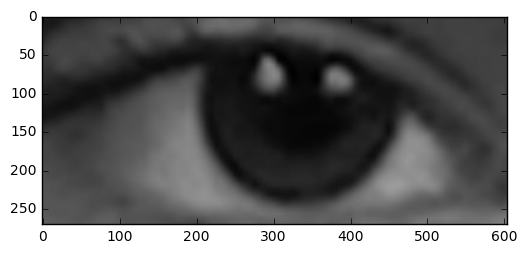

In [40]:
#Let's keep the color image, so we can see the contours there
img = Image.open('eye2.png').convert('LA')
img.save('greyscale.png')
plt.imshow(img)
plt.show()

#### Thresholding and morphing

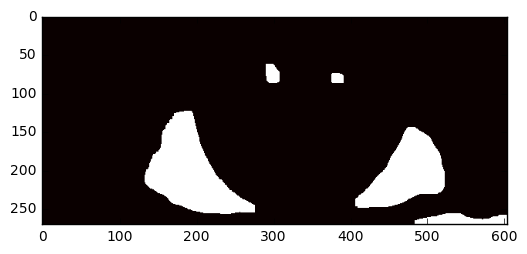

In [45]:
#getting appropriate format for cv2
a = list(img.getdata())
a2 = [i[0] for i in a]
a2 = np.asarray(a2)
#thresholding
ret,thresh1 = cv2.threshold(a2.astype(np.uint8),110,255,cv2.THRESH_BINARY)
thresh1 = np.reshape(thresh1,(img.size[1],img.size[0]))
#we use erosion and dilation to remove noise
morphKernel = np.ones((10, 10), np.uint8)
morph = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, morphKernel)
#plot resulting image
imgMorph = Image.fromarray(morph, 'L')
plt.imshow(imgMorph, cmap = 'hot')
plt.show()

#### Drawing contours

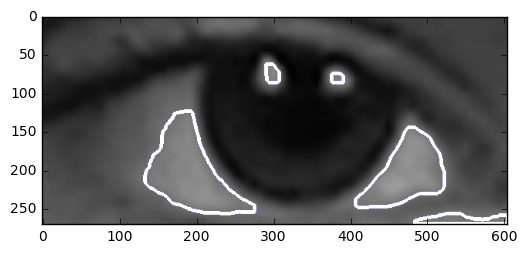

In [80]:
#target2 = cv2.imread('eye2.png', cv2.IMREAD_COLOR)
target = cv2.imread('greyscale.png', cv2.IMREAD_UNCHANGED )
temp = target.copy()

_, contours, hierarchy = cv2.findContours(morph.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(temp, contours, -1, (0, 0, 255), 3)

plt.imshow(temp)
plt.show()

### Catching the catchlight

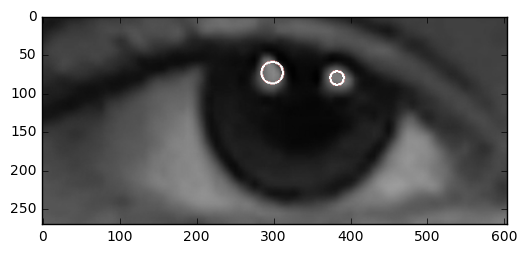

In [81]:
### I manually checked that contours 3 and 4 correspond to the catchlights.

(x, y), radius = cv2.minEnclosingCircle(contours[4])
centre = (int(x), int(y))
radius = int(radius)
cv2.circle(target, centre, radius, (255, 0, 0), 2)

(x, y), radius = cv2.minEnclosingCircle(contours[3])
centre = (int(x), int(y))
radius = int(radius)
cv2.circle(target, centre, radius, (255, 0, 0), 2)

plt.imshow(target)
plt.show()